In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


- Lendo os dados

In [2]:
df = pd.read_csv('./ribeiroGon.csv', index_col = 0)
df = df[df['year']>=1988][['vazao']]
df['date'] = pd.date_range('01-01-1988',periods=len(df), freq='MS')
df = df.set_index(['date'], drop = True)

- Train-test split (últimos 6 anos)

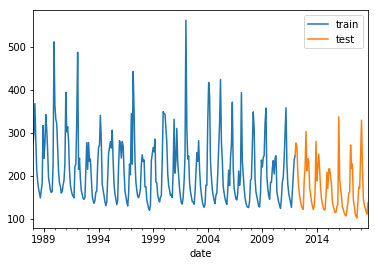

In [3]:
split_date = pd.Timestamp('2012-01-01')

train = df.loc[:split_date]
test = df.loc[split_date:]

ax = train.plot()
test.plot(ax = ax)
plt.legend(['train','test'])

- Min max scaler (normalizando entre [0,1])

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.fit_transform(test)

In [38]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

## NN

In [39]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim = 1, activation = 'relu'))
nn_model.add(Dense(1))
nn_model.compile(loss = 'mean_squared_error', optimizer = 'adam')

early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

history = nn_model.fit(X_train, y_train, epochs = 100, batch_size = 1,
                       verbose = 1, callbacks = [early_stop], shuffle = False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
288/288 [==============================] - 0s 1ms/step - loss: 0.1100
Epoch 2/100
288/288 [==============================] - 0s 667us/step - loss: 0.0689
Epoch 3/100
288/288 [==============================] - 0s 667us/step - loss: 0.0674
Epoch 4/100
288/288 [==============================] - 0s 696us/step - loss: 0.0662
Epoch 5/100
288/288 [==============================] - 0s 657us/step - loss: 0.0653
Epoch 6/100
288/288 [==============================] - 0s 672us/step - loss: 0.0646
Epoch 7/100
288/288 [==============================] - 0s 667us/step - loss: 0.0640
Epoch 8/100
288/288 [==============================] - 0s 743us/step - loss: 0.0635
Epoch 9/100
288/288 [==============================] - 0s 741us/step - loss: 0.0630
Epoch 10/100
288/288 [==============================] - 0s 707us/step - loss: 0.0628
Epoch 11/100
288/288 [===================

In [40]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.478
The R2 score on the Test set is:	0.364


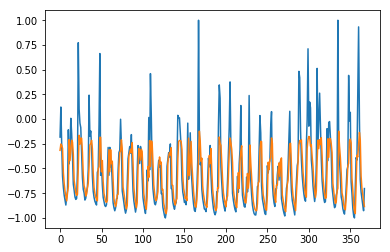

In [48]:
plt.plot(np.append(y_train, y_test))
plt.plot(np.append(y_train_pred_nn,y_pred_test_nn))

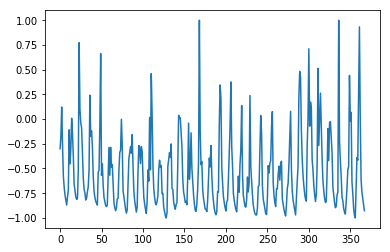

In [51]:
plt.plot(np.append(X_train,X_test))

In [6]:

f#[['vazao']]

,month,year,vazao,data_ticks
19,1,1966,230.477,1966-1
20,2,1966,487.809,1966-2
21,3,1966,302.639,1966-3
22,4,1966,236.850,1966-4
23,5,1966,179.177,1966-5
24,6,1966,157.569,1966-6
25,7,1966,142.693,1966-7
26,8,1966,133.492,1966-8
27,9,1966,140.465,1966-9
28,10,1966,166.483,1966-10
